# Project 5: Data Science & Machine Learning on Votings of the Swiss National Council

In project 5, we will analyze the voting behavior of the "Nationalrat" of the Swiss parliament in a number of ways. The project consists of 3 different files:

* Data Preparation: Prepare the data for the other two notebooks.
* Voting Predictions: Predict the voting behavior of individual members or the entire council.
* Unsupervised (this notebook): Find lower-dimensional representations of the voting behavior and groups of members of parliament.

**Make sure to have run the data preparation notebook before running this one!**

# Preparations

In [1]:
import pandas as pd
import numpy as np
np.random.seed(123)

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import contingency_matrix

Data Loading:

In [4]:
file_path_ss24_nr_root = 'Abstimmungen_NR_2024SS_DE'
df_nr_cast_votes = pd.read_csv(file_path_ss24_nr_root + '_cast_votes.csv', index_col='Reference ID')

Remember that `df_nr_cast_votes` contains the voting proposals as rows, and the members of parliament as columns. Each element in the dataframe contains the vote that the respective person gave to the respective proposal.

For later reference, we also load the summary of each of the proposals:

In [5]:
df_summary = pd.read_csv(file_path_ss24_nr_root + '_summary.csv', index_col='Reference ID')

# Visualising Voting Behavior
In the first part, we will try to visualize the members of parliament according to their voting behavior using dimensionality reduction techniques such as principal component analysis. These methods expect the rows to correspond to individual objects. Hence, we have to *transpose* our dataframe in order to have the objects of our study (the members of parliament) as rows:

In [6]:
df_ss24_nr_participants = df_nr_cast_votes.T
df_ss24_nr_participants

Reference ID,28659,28789,28790,28792,28793,28794,28795,28796,28797,28798,...,29243,29244,29245,29246,29247,29249,29250,29251,29252,29253
"4154 | Addor, Jean-Luc | NR | V | VS | 22.04.1964 | 04.12.2023 | 04.12.2023",1,-1,1,1,1,1,-1,1,1,-1,...,1,1,1,1,-1,1,-1,1,1,1
"4049 | Aebischer, Matthias | NR | S | BE | 18.10.1967 | 04.12.2023 | 04.12.2023",1,1,-1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,1,1,1,1,1
"10803 | Aellen, Cyril | NR | RL | GE | 29.02.1972 | 04.12.2023 | 04.12.2023",1,1,1,-1,1,1,-1,1,1,-1,...,1,1,1,1,1,1,1,1,1,1
"4053 | Aeschi, Thomas | NR | V | ZG | 13.01.1979 | 04.12.2023 | 04.12.2023",1,-1,1,1,1,1,-1,1,1,-1,...,1,1,1,1,-1,1,-1,1,1,1
"10812 | Alijaj, Islam | NR | S | ZH | 18.06.1986 | 04.12.2023 | 04.12.2023",-1,1,-1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4318 | Wyss, Sarah | NR | S | BS | 03.08.1988 | 04.12.2023 | 04.12.2023",-1,1,-1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,1,1,1,1,1
"10846 | Wyssmann, Rémy | NR | V | SO | 20.06.1967 | 04.12.2023 | 04.12.2023",1,-1,1,1,1,1,-1,1,1,-1,...,1,1,1,1,-1,1,-1,1,1,1
"10851 | Zryd, Andrea | NR | S | BE | 24.10.1975 | 04.12.2023 | 04.12.2023",0,1,-1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,1,1,1,1,0
"4179 | Zuberbühler, David | NR | V | AR | 20.02.1979 | 04.12.2023 | 04.12.2023",1,-1,1,1,1,1,-1,1,1,-1,...,1,1,1,1,-1,1,-1,1,1,1


For later visualisation, we separate out the parliamentary group ("Fraktion") each person belongs to:

In [7]:
# Extract the participants' fraction
df_ss24_nr_participants_with_fraction = df_ss24_nr_participants.reset_index()
ss24_nr_participants_fraction = df_ss24_nr_participants_with_fraction['index'].str.split('|').str[3]

## Preparations for Dimensionality Reduction
We define two functions that will simplify our work to run PCA and visualise the results:

In [8]:
def fit_pca(data, n_components):
    """
    Fit a PCA model to the data. Print necessary info. Return the fitted PCA model, principal components, and loadings.

    Args:
    - data: np.array [N, D]. Data to fit PCA to.
    - n_components: int. Number of principal components to keep.

    Returns:
    - pca: sklearn.decomposition.PCA. Fitted PCA model.
    - principal_components: np.array [N, n_components]. Fitted principal components.
    - loadings: np.array [D, n_components]. Fitted loadings.
    """

    # Fit PCA. Get components and loadings
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(data)
    pca_df = pd.DataFrame(data=principal_components, columns=['PC' + str(i+1) for i in range(n_components)])
    loadings = pca.components_

    # Plot (cumulative) explained variance
    cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

    plt.bar(range(1, 1+len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, color='b', label='per component')
    plt.plot(range(1, 1+len(pca.explained_variance_ratio_)), cumulative_explained_variance_ratio, 'r-', label='cumulative')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Ratio of Explained Variance')
    plt.show()
    
    print('Variance by principal component:', pca.explained_variance_ratio_)
    print('Cumulative variance explained by principal components:', cumulative_explained_variance_ratio)

    return pca, pca_df, loadings

In [9]:
def draw_pca_scatter_2d(x, y, hue, title="", colorbar=False, colorbar_name='', ax=None):
    """
    Draw a scatter plot of the first two principal components. Color the points by the given hue.

    Args:
    - x: Iterable [N]. First principal component.
    - y: Iterable [N]. Second principal component.
    - hue: Iterable [N]. Values to color the points by
    - title: str. Title of the plot.
    - colorbar: bool. Whether to show a colorbar.
    - colorbar_name: str. Name of the colorbar.
    - ax: matplotlib.axes.Axes. Axes to plot on.
    """

    # If no axis is provided, create a new one
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Map hue to colors
    if not colorbar: # Category color
        unique_categories = hue.unique() if isinstance(hue, pd.Series) else np.unique(hue)
        color_mapping = {category: plt.cm.tab10(i) for i, category in enumerate(unique_categories)}
        colors_mapped = list(map(color_mapping.get, hue))
    else: # Continuous color
        colormap = plt.cm.viridis
        norm = mcolors.Normalize(vmin=np.min(hue), vmax=np.max(hue))
        colors_mapped = list(map(colormap, map(norm, hue)))

    scatter = ax.scatter(x, y, c=colors_mapped, edgecolor='k', s=50)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(title)
    ax.grid()

    if not colorbar:
        legend_handles = [mpatches.Patch(color=color_mapping[category], label=category) for category in unique_categories]
        plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        cbar = plt.colorbar(scatter, orientation='vertical')
        cbar.set_label(colorbar_name)

    return ax

## PCA for Voting Behavior by Participants of NR
We will now run PCA on the votes of the members. As always, we first have to scale the data:

In [10]:
# Scale the data
scaler = StandardScaler()
scaled_data_participants_ss24_nr = scaler.fit_transform(df_ss24_nr_participants)

Now we can run PCA:

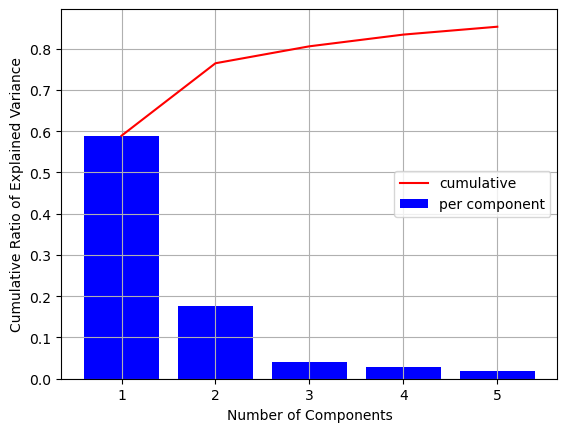

Variance by principal component: [0.58907558 0.17565433 0.0410695  0.02839722 0.01907577]
Cumulative variance explained by principal components: [0.58907558 0.76472991 0.80579941 0.83419663 0.8532724 ]


In [12]:
# PCA decomposition
pca_participants_ss24_nr, pca_df_participants_ss24_nr, loadings_participants_ss24_nr = fit_pca(scaled_data_participants_ss24_nr, 5)

The two first principal components explain over 76 % of the variance in the data. Let's visualize the participants in the two principal components of their cast votes:

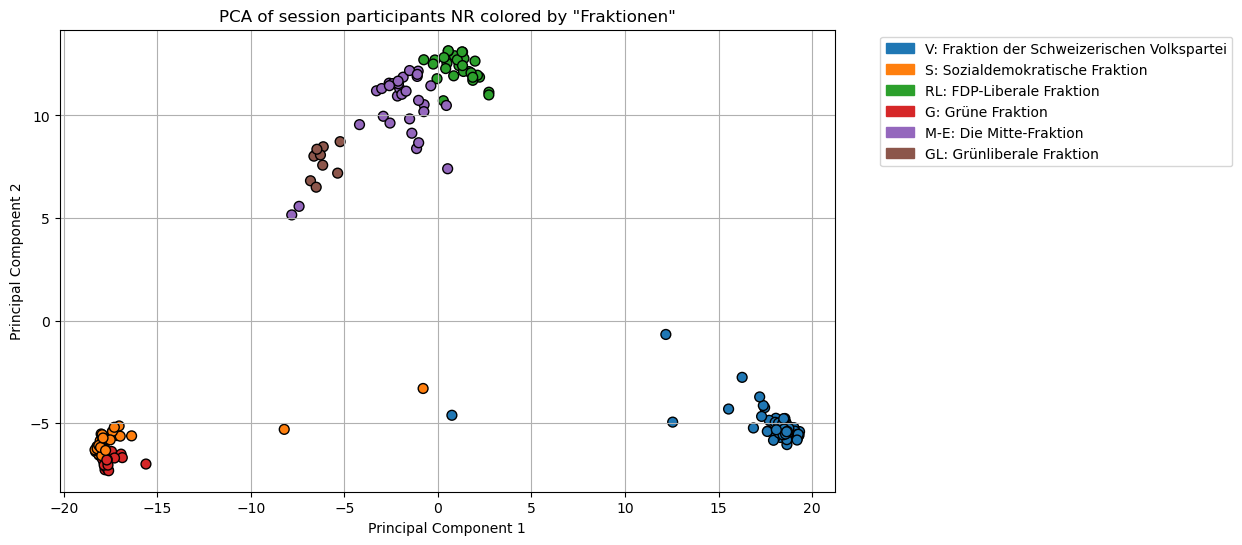

In [13]:
category_meanings = {
    'V': 'Fraktion der Schweizerischen Volkspartei',
    'S': 'Sozialdemokratische Fraktion',
    'M-E': 'Die Mitte-Fraktion',
    'RL': 'FDP-Liberale Fraktion',
    'G': 'Grüne Fraktion',
    'GL': 'Grünliberale Fraktion'
}

draw_pca_scatter_2d(
    pca_df_participants_ss24_nr['PC1'], pca_df_participants_ss24_nr['PC2'],
    ss24_nr_participants_fraction.map(lambda x: ": ".join([x.strip(), category_meanings[x.strip()]])),
    title='PCA of session participants NR colored by "Fraktionen"',
    )
plt.show()

PC1 can be interpreted as left to right standpoint of NR members, while PC2 seems to represent the direction 'middle' vs. 'poles'.

**Exercise:** Plot some additional components (possibly, you also have to calculate the PCA with more components). Which components separate e.g., 'FDP-Liberale Fraktion' from 'Die Mitte-Fraktion'?

Next, we want to look at what proposals have the largest (in absolute terms) loadings; i.e., the voting proposals that are most important in defining the principal components. We define a function to do this, and will then call it for the two first components.

In [15]:
def show_largest_coeffs_and_title(loadings, name_list, nToShow=10):
    loading_sort_idx = np.argsort(abs(loadings), axis=0)
    for idx in loading_sort_idx[:-nToShow:-1]:
        print(loadings[idx], ':', name_list[idx])

In [16]:
show_largest_coeffs_and_title(loadings_participants_ss24_nr[0, :], list(df_summary['Topic Title']))

-0.06080929755668174 : Voranschlag 2024. Nachtrag I
-0.06080929755668174 : Voranschlag 2024. Nachtrag I
-0.060767880643710956 : Voranschlag 2024. Nachtrag I
-0.060720784646986235 : Voranschlag 2024. Nachtrag I
-0.060694643883749205 : Voranschlag 2024. Nachtrag I
-0.06062212620896764 : Bei häuslicher Gewalt die Härtefallpraxis nach Artikel 50 AIG garantieren
-0.060602269073021936 : Erwerbsersatzgesetz (Digitalisierung in der Erwerbsersatzordnung). Änderung
-0.06060210526777045 : Förderung von Bildung, Forschung und Innovation in den Jahren 2025–2028
-0.06058587836384624 : Foltergütergesetz


In [17]:
show_largest_coeffs_and_title(loadings_participants_ss24_nr[1, :], list(df_summary['Topic Title']))

0.1236415838519298 : Strafgesetzbuch und Jugendstrafgesetz. Änderung
-0.1208029945879445 : ZGB. Änderung (Massnahmen gegen Minderjährigenheiraten)
-0.11811400155307689 : ZGB. Änderung (Massnahmen gegen Minderjährigenheiraten)
-0.1154149784320152 : Aktionsplan für mehr Rechtssicherheit bei fürsorgerischer Unterbringung, bewegungseinschränkenden Massnahmen und Behandlung ohne Zustimmung
-0.11375559599785817 : Statistische Erfassung fürsorgerischer Unterbringung, bewegungseinschränkender Massnahmen und von Behandlungen ohne Zustimmung
-0.11094590249691423 : Fokussierung auf die verfassungsmässigen Aufgaben der Armee. Keine Teilnahme an Nato-Bündnisfallübungen!
-0.11013806837064441 : Den Verwurf aufgrund von ungeeigneten Packungsgrössen oder Dosisstärken bei den Medikamentenpreisen berücksichtigen
-0.10527798213525023 : Berufsbildung. Stärkung der Berufsberatung
-0.08662044449607426 : Vorbereitung und Unterstützung der humanitären Minenräumung in der Ukraine


Only knowing the titles of the voting proposals, is often not enough to know what the exact question was. However, we can somewhat identify the topics that are most important in determining the position of a person in the principal component space: For component 1, we see that it's mostly the budget questions, while for component 2, potential modification on the penal code and the focus of the army are most important.

# Clustering Members of Parliament by Their Cast Votes

## K-Means Clustering
We will start with K-Means clustering. 
Hence, we need to determine the number of clusters we want to compute.

**Exercise:** Besides the technical measures (which we will look at right afterwards), what other way to determine the number of clusters could be useful or interesting?

We will now determine the best number of clusters using the elbow method and the silhouette score.

**Exercise:** Implement code to make a plot for the elbow method and for the silhouette score, for K-Means with k between 1 and 10. What value of k is best suited according to these methods?

Motivated by the fact that there are 6 parliamenary groups, and the silhouette score is not clearly higher for 3 than for 6, we choose k=6 for K-Means.

In [19]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=20)
kmeans_clusters = kmeans.fit_predict(scaled_data_participants_ss24_nr)

With the below code, we plot the **contingency matrix** (or contingence table), which counts how many objects (in our case: members of parliament) are assigned to a given cluster (on the x axis) and belong to a given parliamentary group (on the y axis):

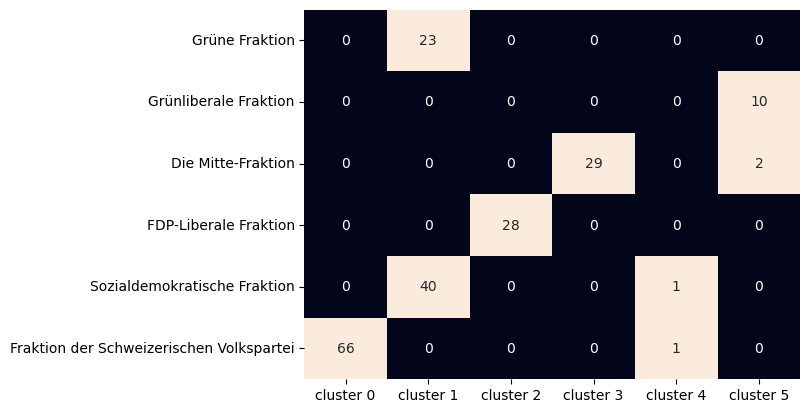

In [20]:
cont_mat = contingency_matrix(ss24_nr_participants_fraction, kmeans_clusters)
sns.heatmap(cont_mat, annot=True, vmin=0, vmax=1, cbar=False,
            xticklabels=['cluster ' + str(i) for i in range(max(kmeans_clusters)+1)],
            yticklabels=[category_meanings[key] for key in ['G', 'GL', 'M-E', 'RL', 'S', 'V']])

plt.show()

**Exercise:** Comment the above contingency matrix. What might be surprising? With the above comparison, which members of parliament might be interesting for further research?

## Hierarchical Clustering
Next, we do hierarchical clustering.

**Exercise:** 

* Run hierarchical clustering using the `linkage` function. Which method do you choose? Why?
* Plot a dendrogram (using the `dendrogram`) function.

**Exercise:** Interpret the dendrogram. Can you relate it to the discussion on the number of clusters for K-Means?

# Beyond Data
In this notebook we have looked at the cast votes of the members of parliament.

**Exercise:** What aspects might be missing? What did we possibly disregard or ignore? How could we cover these aspects?